<a href="https://colab.research.google.com/github/2303a51885/AIML-2025/blob/main/Lab08_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
car_data=fetch_openml(name='car', version=2, parser='auto')

In [90]:
type(car_data)

sklearn.utils._bunch.Bunch

In [91]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [92]:
print(f"Features:{car_data.feature_names}\nDistribution of Decision :{car_data.target.value_counts()}")

Features:['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
Distribution of Decision :binaryClass
P    1210
N     518
Name: count, dtype: int64


In [93]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [97]:
type(car_data)

pandas.core.frame.DataFrame

<Axes: xlabel='binaryClass', ylabel='count'>

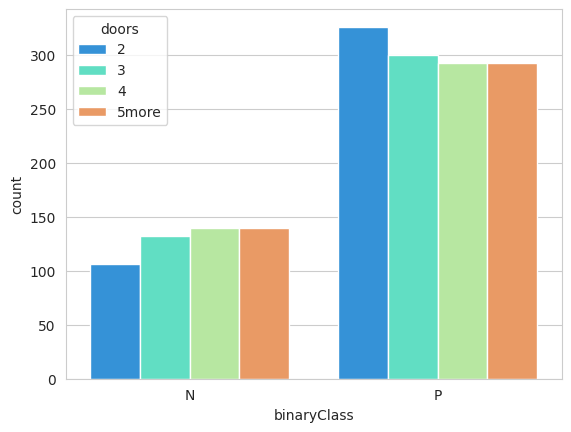

In [99]:
sns.countplot(x=car_data.binaryClass, hue='doors',data=car_data,palette='rainbow')

<Axes: xlabel='binaryClass', ylabel='count'>

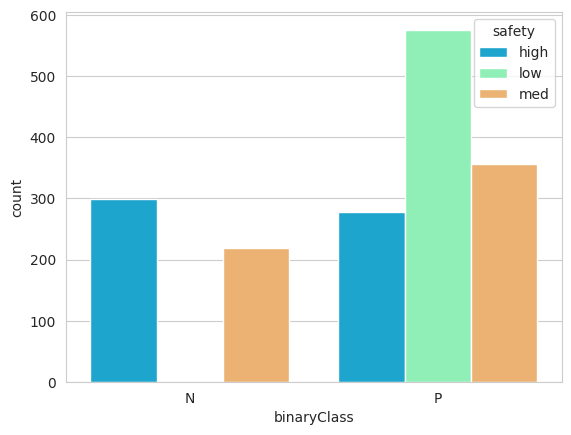

In [100]:
sns.countplot(x=car_data.binaryClass, hue='safety',data=car_data,palette='rainbow')

In [102]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.2,random_state=20)
car_data.shape,train_data.shape,test_data.shape

((1728, 7), (1382, 7), (346, 7))

In [103]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [104]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [105]:
train_data['buying'].value_counts()

,count
buying,
med,364
high,345
vhigh,343
low,330


In [106]:
train_data['maint'].value_counts()

,count
maint,
med,351
high,349
vhigh,344
low,338


In [108]:
train_data['doors'].value_counts()

,count
doors,
2,359
5more,350
4,347
3,326


In [107]:
train_data['safety'].value_counts()

,count
safety,
low,462
high,460
med,460


In [112]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [111]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline # Import Pipeline from sklearn.pipeline instead of sklearn.preprocessing
pipe =Pipeline([('ord_enc', OrdinalEncoder())])
car_data_train=pipe.fit_transform(train_data)
car_data_train

array([[0., 3., 0., ..., 0., 1., 1.],
       [3., 3., 1., ..., 2., 1., 1.],
       [2., 2., 3., ..., 2., 1., 1.],
       ...,
       [3., 2., 2., ..., 2., 2., 1.],
       [0., 3., 1., ..., 0., 1., 1.],
       [1., 3., 3., ..., 2., 0., 1.]])